In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [41]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [42]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [43]:
dengue['Year'] = dengue['Year'].astype('int')

In [44]:
dengue.dtypes

Month            object
Year              int32
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

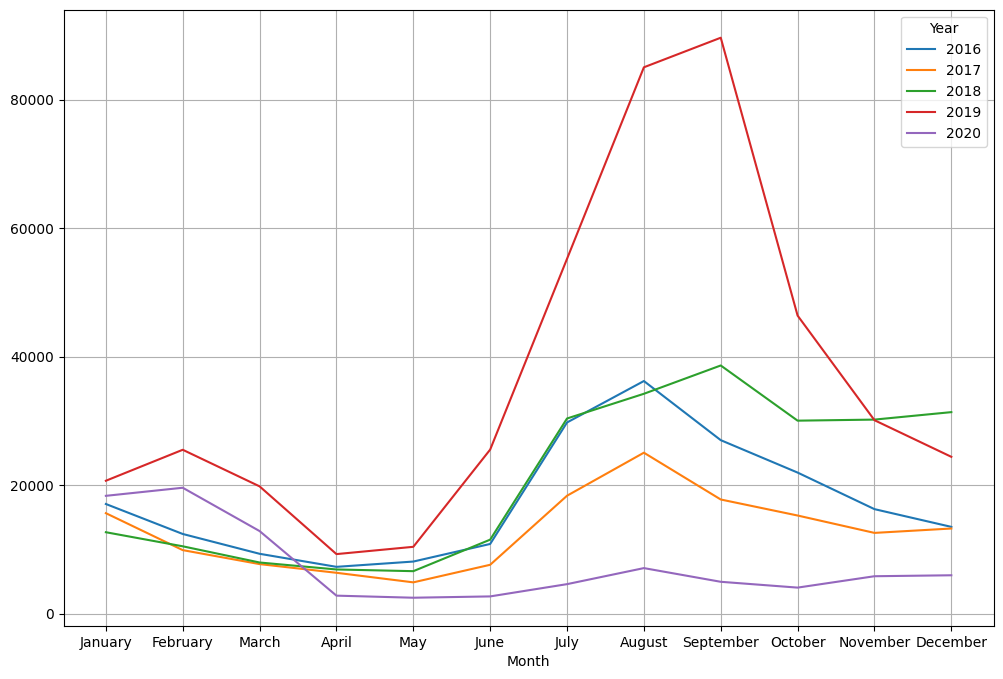

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


In [9]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> LINE PLOT WITH SEABORN </h1>

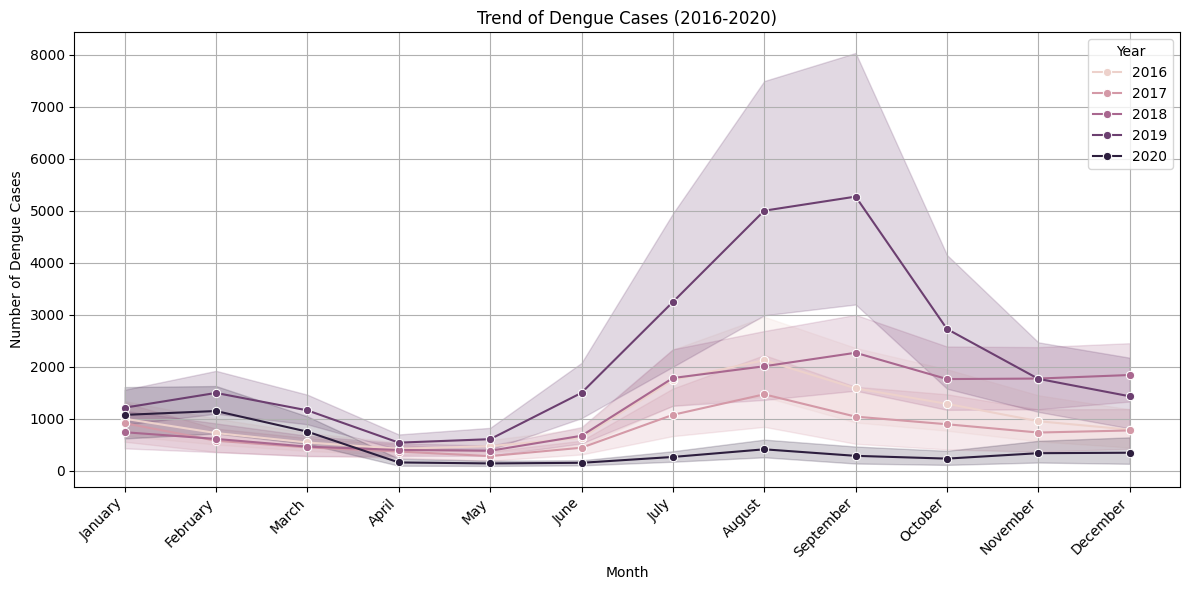

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

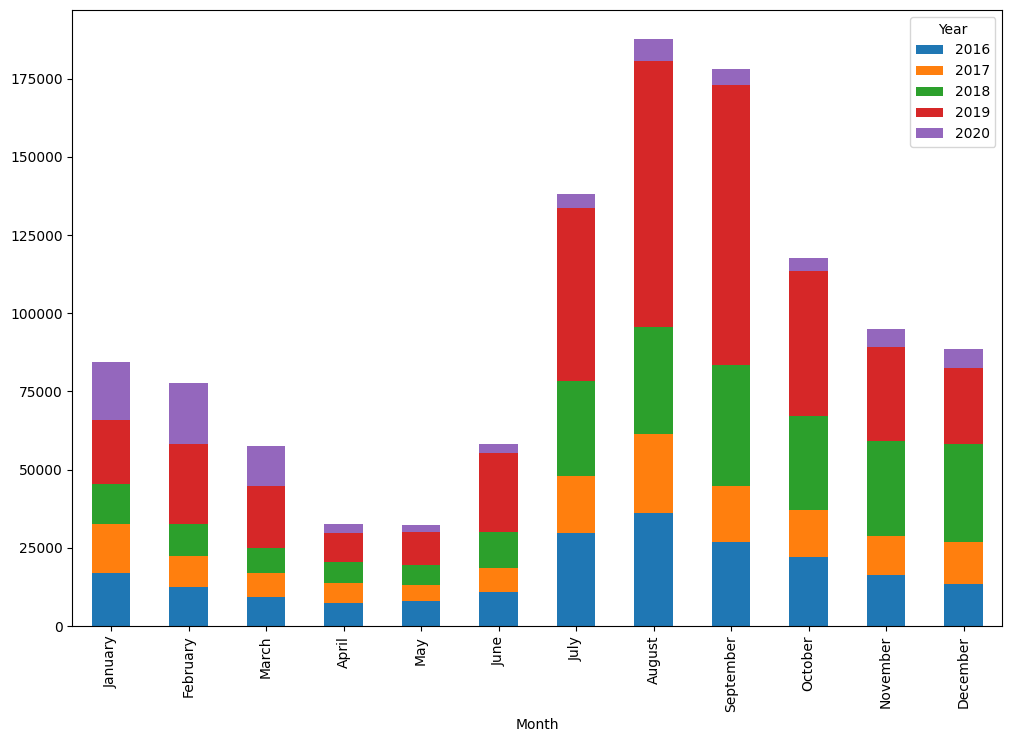

In [11]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

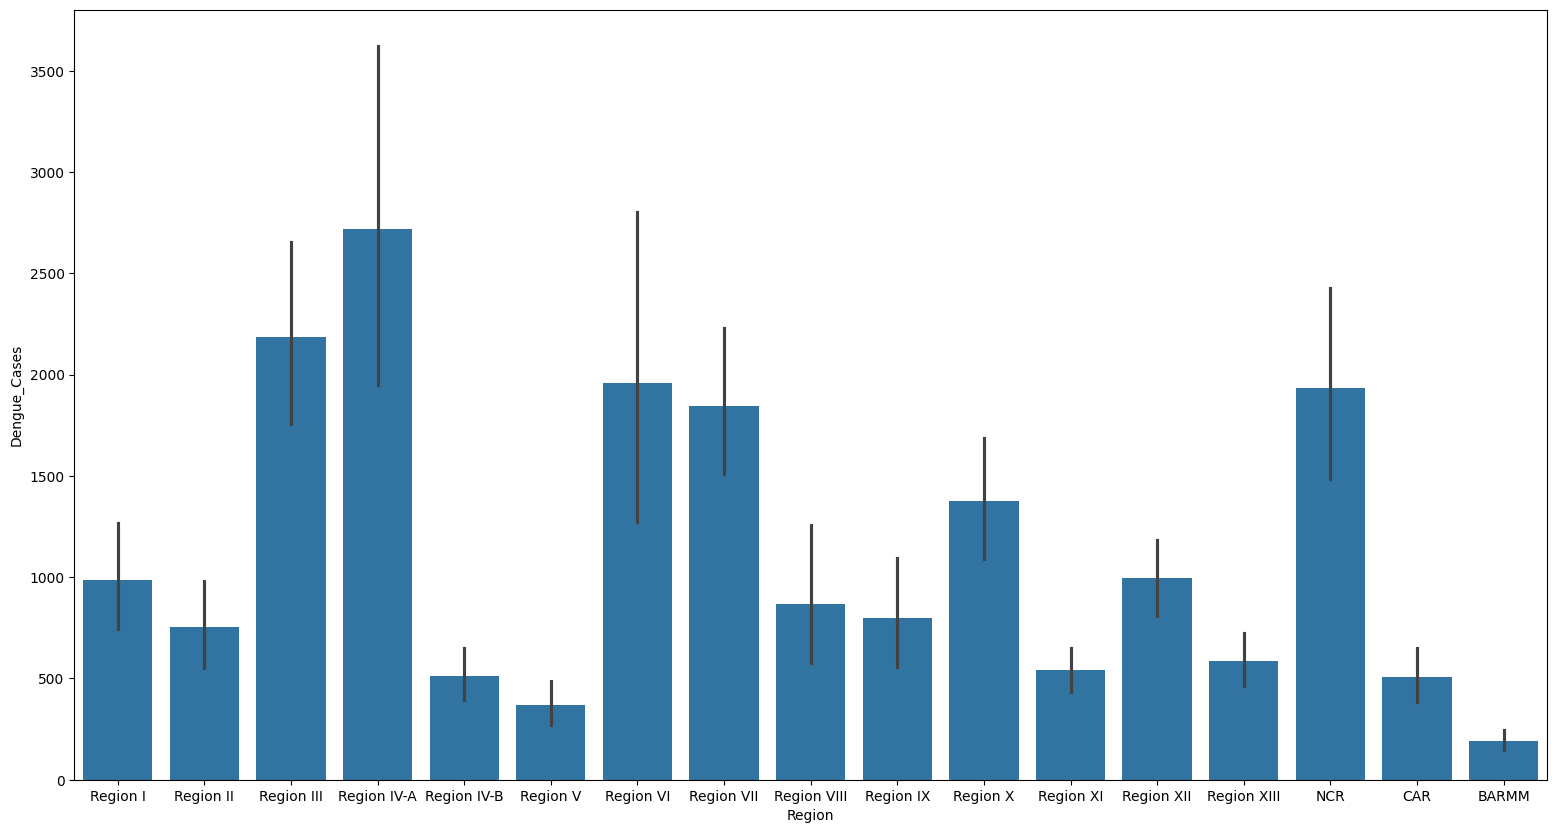

In [12]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [13]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [14]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [15]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [16]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


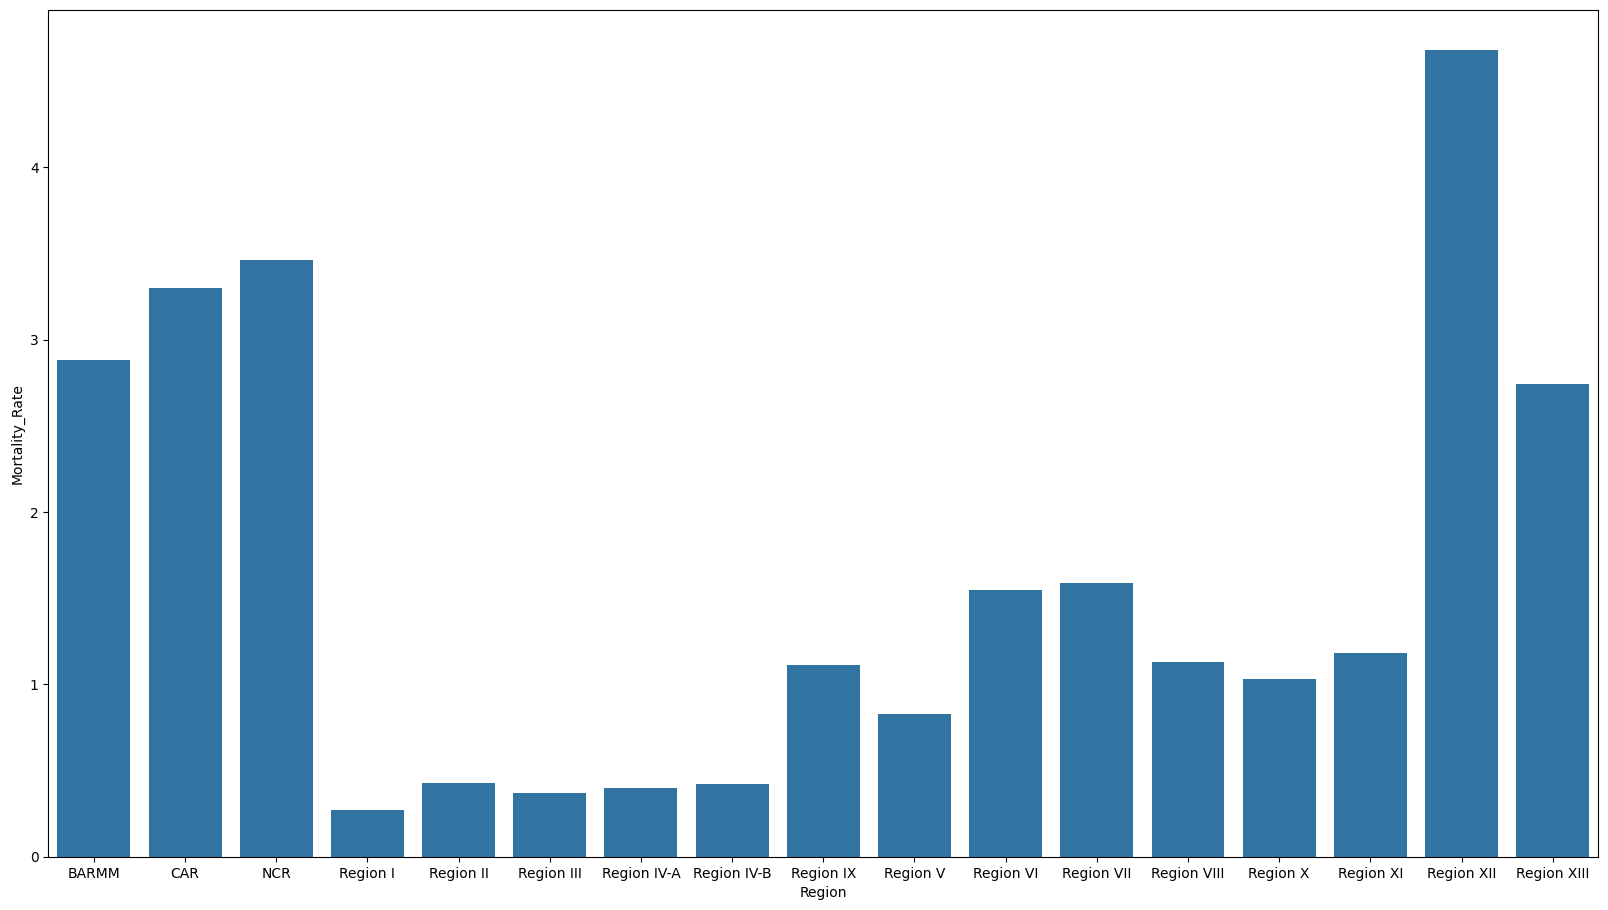

In [17]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

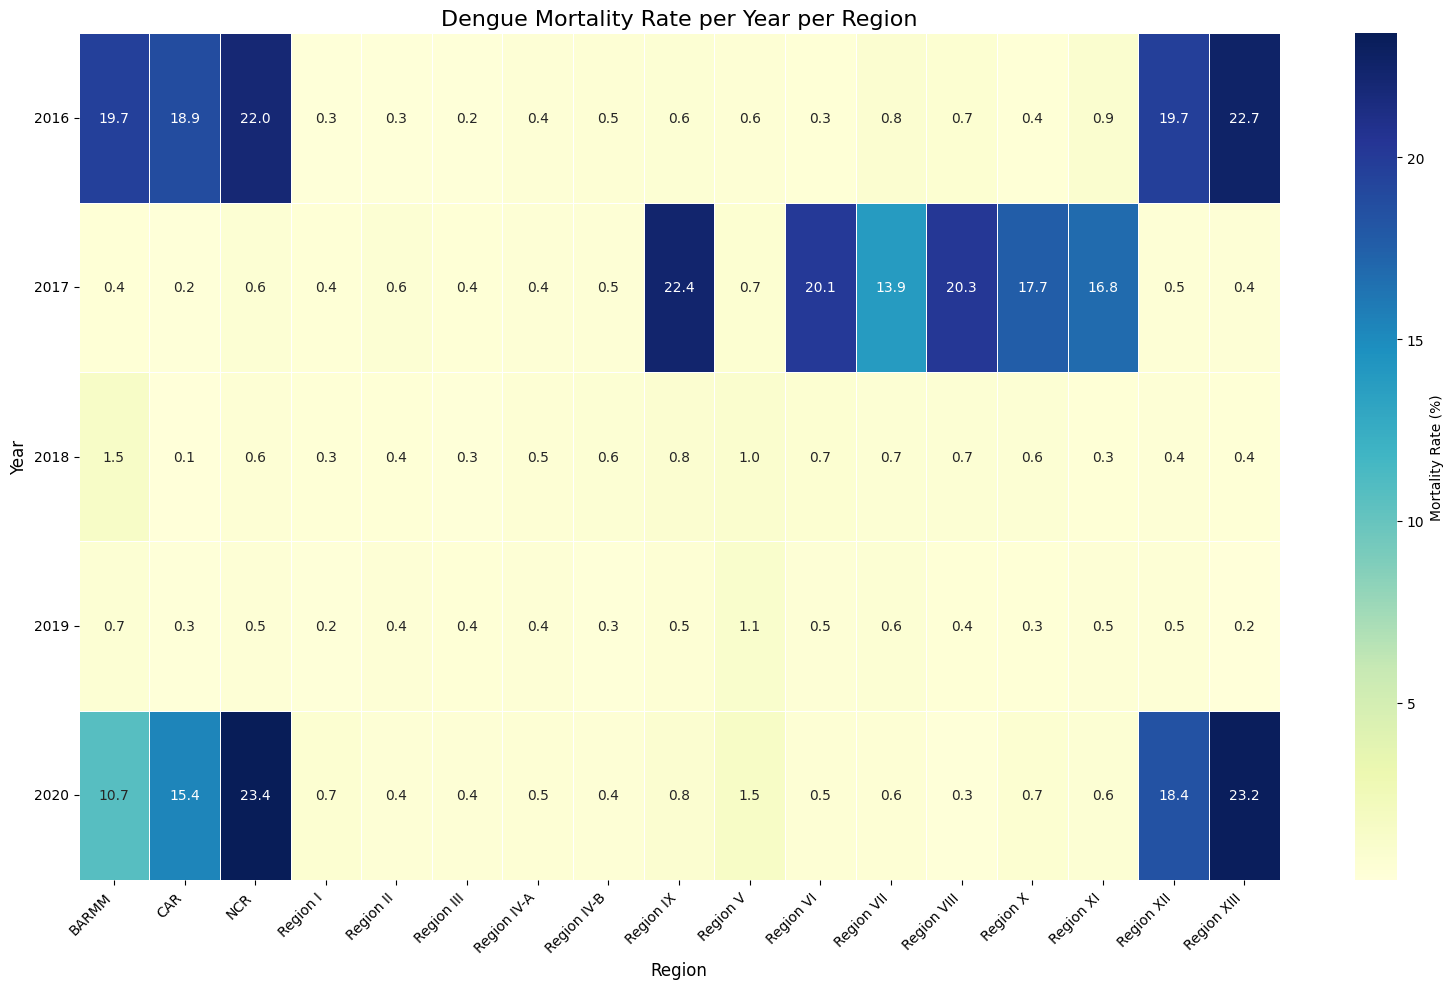

In [18]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVES </h1>

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [19]:
dengue['Month'] = dengue['Month'].astype('str')

In [5]:
# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

In [6]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()


In [7]:
monthly_cases

,Date,Dengue_Cases
0,2016-01-01,2993
1,2016-02-01,2035
2,2016-03-01,1327
3,2016-04-01,838
4,2016-05-01,714
5,2016-06-01,778
6,2016-07-01,2270
7,2016-08-01,3218
8,2016-09-01,3454
9,2016-10-01,3175


In [23]:
#pip intall scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal for regression

monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# # # Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1) #independent variable 
y = monthly_cases['Dengue_Cases'].values   #dependent variable 

# # # Fit model
model = LinearRegression()
model.fit(X, y)

# # # Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# # # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")


The model explains 1.7% of the variation in dengue cases.


In [12]:
monthly_cases

,Date,Dengue_Cases,Date_Ordinal,Predicted_Cases
0,2016-01-01,2993,735964,1946.568049
1,2016-02-01,2035,735995,1973.180297
2,2016-03-01,1327,736024,1998.075625
3,2016-04-01,838,736055,2024.687873
4,2016-05-01,714,736085,2050.441661
5,2016-06-01,778,736116,2077.053908
6,2016-07-01,2270,736146,2102.807696
7,2016-08-01,3218,736177,2129.419944
8,2016-09-01,3454,736208,2156.032191
9,2016-10-01,3175,736238,2181.785979


In [27]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


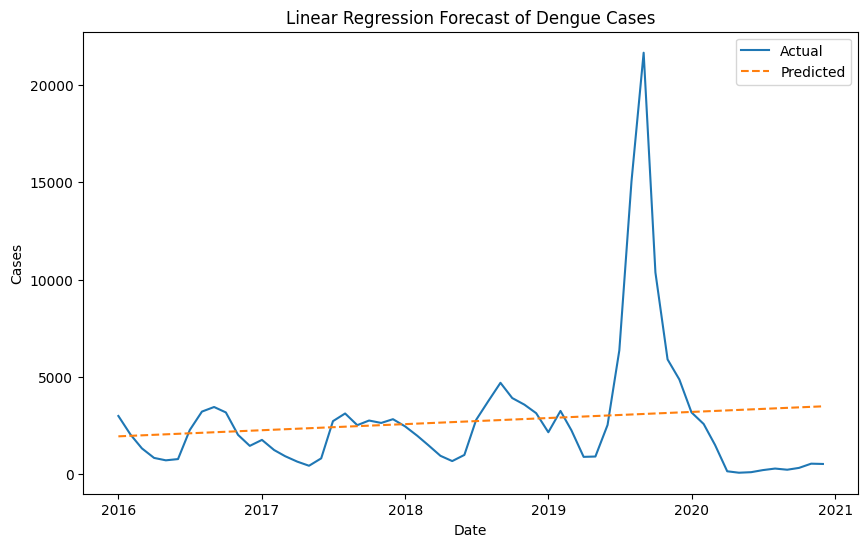

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_cases['Date'], monthly_cases['Dengue_Cases'], label='Actual')
plt.plot(monthly_cases['Date'], monthly_cases['Predicted_Cases'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()


<h1>DEMONSTRATION OF VARIATION OF DEPENDENT </h1>
<hr>
<h2>Gas Price Data set </h2>

In [14]:
gas  = pd.read_csv('datasets\\gas_prices.csv')

In [15]:
gas

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np



X = gas['Year'].values.reshape(-1, 1)  # Independent variable (Year)
y = gas['USA'].values                  # Dependent variable (Gas Price in USA)

# # Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# # # Predict
gas['Predicted_Price'] = model.predict(X)

# # # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in gas prices in the USA.")


The model explains 70.8% of the variation in gas prices in the USA.


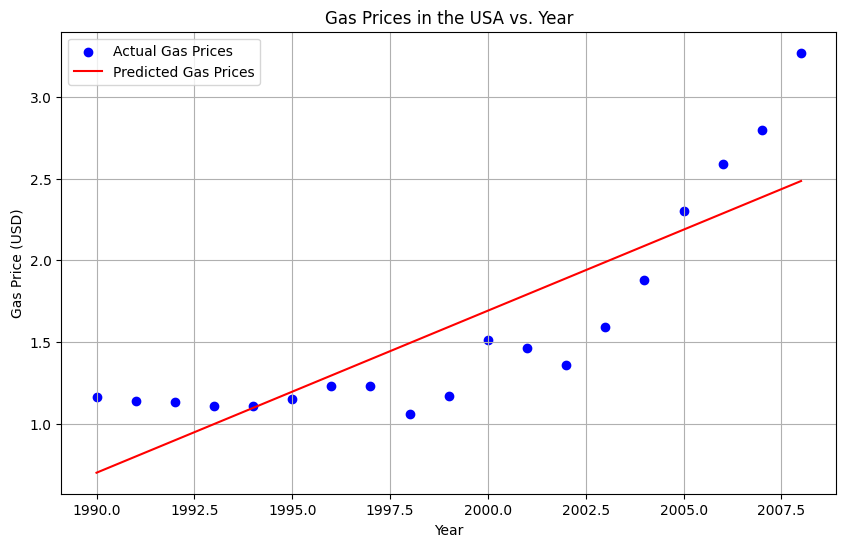

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(gas['Year'], gas['USA'], color='blue', label='Actual Gas Prices')
plt.plot(gas['Year'], gas['Predicted_Price'], color='red', label='Predicted Gas Prices')
plt.title('Gas Prices in the USA vs. Year')
plt.xlabel('Year')
plt.ylabel('Gas Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
gas

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA,Predicted_Price
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16,0.699368
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14,0.798561
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13,0.897754
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11,0.996947
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11,1.096140
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15,1.195333
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23,1.294526
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23,1.393719
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06,1.492912
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17,1.592105


<h1>LOGISTIC REGRESSION </h1>

<hr>

## 🧠 The Big Idea: From Line to S-Curve (Sigmoid)

Instead of a straight line, logistic regression uses an **S-shaped curve** called the **sigmoid function**:

$$
\text{Probability} = \frac{1}{1 + e^{-(b_0 + b_1 x)}}
$$

- If probability ≥ 0.5 → predict **1** (e.g., "Yes")
- If probability < 0.5 → predict **0** (e.g., "No")

This turns a linear combination into a **probability**!

<h1>Terminology in Evaluating a Classfication Model</h1>

## Confusion Matrix

- A confusion matrix is a table used to evaluate the performance of a classification model. It summarizes how a model's predictions compare to the actual outcomes, showing the counts for correct and incorrect classifications. The matrix is crucial for understanding model performance beyond simple accuracy by highlighting where the model is making mistakes, with its most common form for binary classification being a \(2\times 2\) table that shows four key values: true positives, true negatives, false positives, and false negatives.

<img src = 'https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c42677529a0f4e97e4f96_644aea65cefe35380f198a5a_class_guide_cm08.png' />

<h2>Interpreting Result </h2>
<hr>

<p>Interpreting results from a classification model differs from linear regression. Evaluation often includes metrics such as precision, recall, and the F1 score, which balances both. These measurements help assess how well the model distinguishes between classes and are not exclusive to logistic regression—they apply broadly across classification models. </p>

<table>
    <tr>
        <th>
            Metric
        </th>
        <th>
            Meaning
        </th>
    </tr>
    <tr>
        <td>
            Precision
        </td>
        <td>
            Of all predicted cases in a class, how many were correct?
        </td>
    </tr>
    <tr>
        <td>
            Recall
        </td>
        <td>
            Of all actual cases in a class, how many did the model correctly find?
        </td>
    </tr>
    <tr>
        <td>
            F1-score
        </td>
        <td>
            Harmonic mean of precision and recall—balances both metrics
        </td>
    </tr>
    <tr>
        <td>
            Support
        </td>
        <td>
            Number of actual instances in each class in the test set
        </td>
    </tr>
</table>



<h3>Basic Application of Logistic Regression</h3>

### Binary Classification: "Outbreak or Not?"
Create a binary target variable:
* 1 if dengue cases in a region exceed a certain threshold (e.g., 1,000 cases in a month)
* 0 otherwise

This lets students predict the likelihood of an outbreak based on features like:

* Month (seasonality)
* Region (geography)
* Year (trend)
Lag features (e.g., previous month’s cases)

in Python
dengue['Outbreak'] = (dengue['Dengue_Cases'] > 1000).astype(int)

In [20]:

# Create binary target: Outbreak = 1 if cases > 1000
dengue['Outbreak'] = (dengue['Dengue_Cases'] > 1000).astype(int)

#create a column named 'Outbreak', fill those values with True or False by examining dengue cases above 1000


In [21]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Date,Outbreak
0,January,2016,Region I,705,1,2016-01-01,0
840,January,2016,NCR,1261,4,2016-01-01,1
780,January,2016,Region XIII,1116,6,2016-01-01,1
240,January,2016,Region IV-B,203,1,2016-01-01,0
120,January,2016,Region III,1976,3,2016-01-01,1
...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,2020-12-01,0
899,December,2020,NCR,658,4,2020-12-01,0
59,December,2020,Region I,1081,1,2020-12-01,1
659,December,2020,Region X,281,1,2020-12-01,0


In [28]:
# Encode categorical features
df_encoded = pd.get_dummies(dengue[['Region', 'Month']], drop_first=True)

# Combine with numerical features
df_model = pd.concat([df_encoded, dengue[['Year', 'Dengue_Cases', 'Outbreak']]], axis=1)


In [34]:
df_encoded

,Region_CAR,Region_NCR,Region_Region I,Region_Region II,Region_Region III,Region_Region IV-A,Region_Region IV-B,Region_Region IX,Region_Region V,Region_Region VI,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
840,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
780,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
240,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
120,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
899,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
59,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
659,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [29]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Outbreak', axis=1)
y = df_model['Outbreak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[148   0]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        56

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



## Class Breakdown
<table>
    <tr>
        <th>
Severity Level</th>	<th>Precision</th>	<th>Recall</th>	<th>F1-score</th>	<th>Support	</th> <th> Interpretation </th></tr>
    <tr><td>0 (Low)</td>	<td>1.00</td>	<td>1.00</td>	<td>1.00</td>	<td>62</td>	<td>All 62 low severity cases were perfectly predicted.</td></tr>
    <tr><td>1 (Moderate)</td>	<td>1.00</td>	<td>1.00</td><td>1.00</td>	<td>86</td>	<td>All 86 moderate cases were correctly classified.</td></tr>
    <tr><td>2 (High)</td>	<td>1.00</td>	<td>1.00</td>	<td>1.00</td>	<td>56</td>	<td>All 56 high severity cases were accurately predicted.</td></tr>

</table>

### 🧠Overall Metrics
- Accuracy = 1.00 → 100% of predictions were correct.
- Macro avg → Average of precision, recall, and F1 across all classes (treats all classes equally).
- Weighted avg → Same as macro, but accounts for class imbalance (weighted by support).

### ✅ What This Means
Your model perfectly classified all severity levels in the test set.
This could indicate:
- Very distinct patterns in the data.
- Possibly overfitting if the test set is small or too similar to training data.
- Or just a well-prepared dataset with strong signal.

<h3>Advanced Application of Logistic Regression using Dengue Data Set </h3>

### Multi-Class Classification: Severity Level
Instead of binary, classify dengue severity into categories:

* 0 = Low (< 300 cases) 
* 1 = Moderate (300–1000)
* 2 = High (> 1000)

- This introduces multinomial logistic regression, and helps students understand how logistic regression generalizes beyond binary.

In [34]:
dengue.dtypes

Month                     object
Year                       int64
Region                    object
Dengue_Cases               int64
Dengue_Deaths              int64
Mortality_Rate           float64
Date              datetime64[ns]
dtype: object

In [50]:
def classify_severity(cases):
    if cases < 300:
        return 0
    elif cases <= 1000:
        return 1
    else:
        return 2

dengue['Severity'] = dengue['Dengue_Cases'].apply(classify_severity)

In [51]:
dengue.dtypes

Month            object
Year              int32
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
Outbreak          int32
Severity          int64
dtype: object

In [52]:
# Encode categorical features
df_encoded = pd.get_dummies(dengue[['Region', 'Month']], drop_first=True)

# Combine with numerical features
df_model = pd.concat([df_encoded, dengue[['Year', 'Dengue_Cases', 'Severity']]], axis=1)

In [53]:
df_model

,Region_CAR,Region_NCR,Region_Region I,Region_Region II,Region_Region III,Region_Region IV-A,Region_Region IV-B,Region_Region IX,Region_Region V,Region_Region VI,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year,Dengue_Cases,Severity
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2016,705,1
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2016,374,1
2,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2016,276,0
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2016,240,0
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,2016,243,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2020,91,0
1016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,2020,16,0
1017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,2020,13,0
1018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,2020,15,0


In [54]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Severity', axis=1)
y = df_model['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.linear_model import LogisticRegression

# Multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[61  0  0]
 [ 0 93  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        50

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204

